# EXPLORATION_2

# 1. Diabetes

### 1.1 모듈설정

#### - pandas, numpy, sklearn 등 기본적인 모듈을 import한다.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from IPython.display import display, Image

In [97]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

### 1.2 데이터 로드

#### - sklearn.datasets에 포함된 diabetes 데이터를 dataframe 형태로 불러와 데이터를 확인해본다.
#### - 간단하게 head(5)로 5줄 정도만 불러왔고, 10개의 칼럼들로 이루어진 것을 확인할 수 있다.

In [5]:
diabetes=load_diabetes()
print(diabetes.keys())
diabetes_df = pd.DataFrame(data=diabetes.data , columns=diabetes.feature_names)
print(diabetes_df.head(5))

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


#### - 'DESCR'를 확인한다.

In [6]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### diabetes_dataset
 - 인스턴스 : 442개
 - 컬럼 수 : 10 개(age, sex, bmi 등)
 - 타겟 : 기준점 1년 후 질병 진행의 정략적 측정 값
 - 특징 :  

### 1.3 데이터 분류 및 학습

#### - 모델에 입력할 X, y데이터를 준비한다  

#### - 442개의 데이터가 잘 준비된 것을 확인할 수 있다

In [75]:
df_X = diabetes.data
df_y = diabetes.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


#### - 쓰기 편하게 X, y 로 수정했다  

In [76]:
X = df_X
y = df_y

#### ===== 뒤에서 자세히 설명하겠지만 test_size의 설정이 중요하다 =====

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=22)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(265, 10) (265,)
(177, 10) (177,)


#### - 가중치 W(칼럼 수에 맞춰 준비), 바이어스 b 값을 설정한다

In [78]:
W = np.random.rand(10)
b = np.random.rand()
print(W, b)

[0.52454223 0.30556744 0.66128578 0.68601471 0.35399108 0.70155921
 0.15044791 0.71379    0.68095207 0.02394821] 0.6737813558038994


#### - model, loss, MSE, gradient를 구하는 함수를 구현한다  
 - learning_rate 값도 설정한다  
    (learning_rate 값은 기본 0.001로 설정했으며 0.1 부터 0.0001까지 조정했다)

In [79]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db
    
LEARNING_RATE = 0.001

#### - 손실함수를 초기화시키고 W, b를 업데이트 하며 손실함수를 기록하는 과정을 진행한다.
 - 100,000번이 생각보다 많아 보이지만, 데이터가 적다는 점을 고려하여 설정했다.)  

 - 적절한 값을 찾으려면 모델 학습 후 plot(losses) 그래프를 통해 셋팅 값을 줄여갈 수 있다)  
 
 - iter 값이 약 40,000번을 넘어서면 Loss 값의 변동은 미미한 수준이다.

In [80]:
losses = []

for i in range(1, 100000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10000 : Loss 3080.5389
Iteration 20000 : Loss 2956.3016
Iteration 30000 : Loss 2940.8852
Iteration 40000 : Loss 2937.6136
Iteration 50000 : Loss 2936.1332
Iteration 60000 : Loss 2935.0822
Iteration 70000 : Loss 2934.2225
Iteration 80000 : Loss 2933.4915
Iteration 90000 : Loss 2932.8618


 - plot 그래프를 보면 Loss값을 잘 찾아가고 있는 것을 확인할 수 있다.

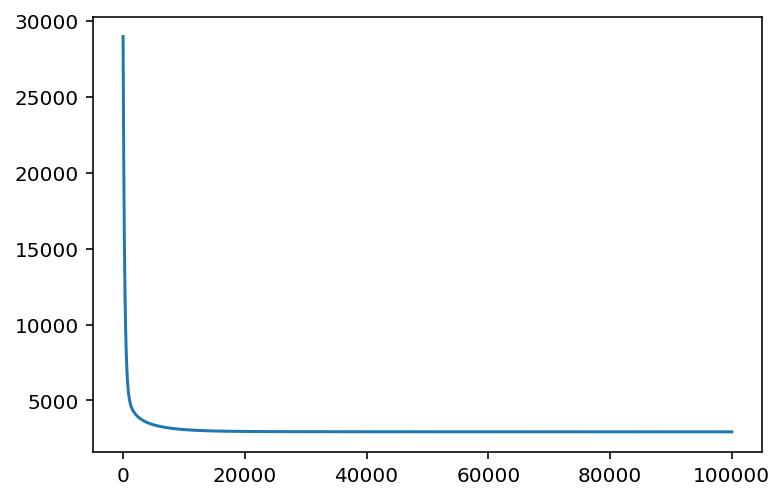

In [81]:
plt.plot(losses)
plt.show()

- test에 대해서 예측을 진행한다.

In [82]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

2911.7195832775355


#### - 데이터를 train과 test로 분류할 때 test_size를 지정하는 부분과 관련된 내용(learning_rate 0.001 기준)
##### 1) test_size=0.2 / train_mse = 약 2,815, test_mse = 약 3,180  
##### 2) test_size=0.3 / train_mse = 약 2,868, test_mse = 약 2,994  
##### 3) test_size=0.4 / train_mse = 약 2,932, test_mse = 약 2,911
   
==============================================================================================
 - 위 결과에서 보이는 것과 같이 test 데이터의 크기가 너무 작으면 정작 훈련된 데이터를 가지고 예측을 진행했을 때 mse 값의 차이가 크게 벌어지는 현상이 있었다. 이에 적절한 test_size를 지정해야 하며,0.3~0.4 정도로 하는 것이 적합해 보인다(원인을 생각해보자면 test_data의 크기가 작으면 분류해야 할 타깃의 분포가 균일하지 못해서 발생했을 것이라 추측한다)

#### - Learning_rate 값 조절
##### 1) learning_rate = 1 / mse 값 발산
##### 2) learning_rate = 0.1 / mse = 2923
##### 3) learning_rate = 0.01 / mse = 2924
##### 4) learning_rate = 0.001 / mse = 2932
##### 5) learning_rate = 0.0001 / mse = 3116

==============================================================================================

 - 결과를 보면 0.1 ~ 0.001까지의 값으로 이용하는 것이 유효하다.
 - 1값은 무한대로 발산하는 모습을 볼 수 있고, 0.0001값은 mse 값이 3,000을 넘어간다.  
 (추측해보건데 0.1 값이 우리가 원하는 global oprimum 가장 최적의 해를 구할 수 있다고 판단하며, 너무 큰 값을 설정하면 global optimum 근처도 못가고 발산하고, 너무 작은 값을 선택하면 Local optimum에 빠질 수 있다고 생각한다.) 

 - 산점도로 확인

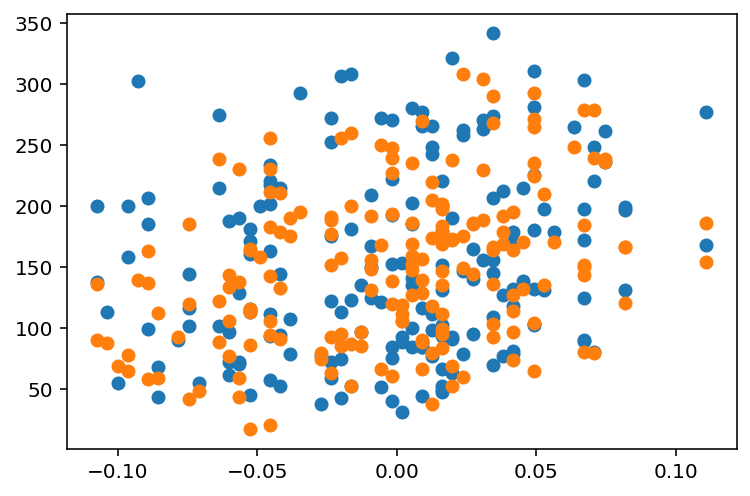

In [23]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.show()

 - 실제 데이터와 예측 데이터가 잘 맞는 것처럼 보인다. 아래는 x, y 축을 좀 더 늘려보았다.

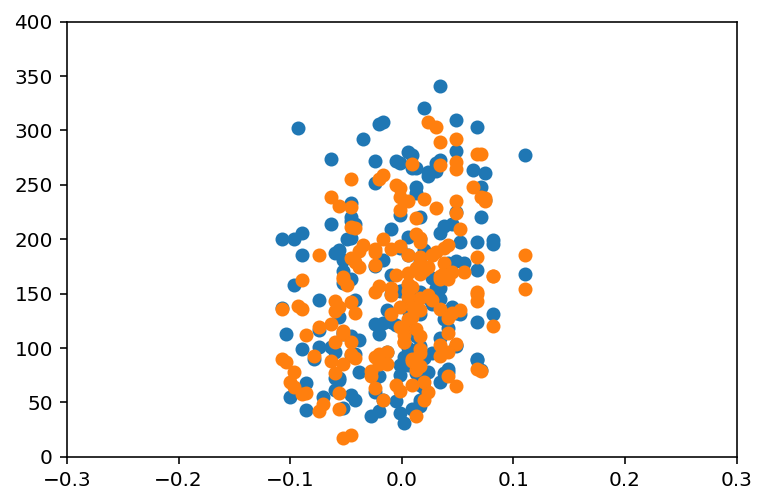

In [35]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.ylim(0, 400)
plt.xlim(-0.3, 0.3)
plt.show()

#### - LinearRegression 모델 학습

 - sklearn의 LinearRegession 모델로 학습해본다.
 (기존 데이터와 섞이지 않게 뒤에 _L을 붙여 구분)  
 - 위에서 함수를 만들며 실습한 모델을 다른 모델과 비교하여 잘 동작하는지 여부를 확인하고자 한다.

In [88]:
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
model_L = LinearRegression()

In [90]:
model_L.fit(X_train_L, y_train_L)

LinearRegression()

In [95]:
predictions_L = model_L.predict(X_test_L)
predictions_L

array([138.47032272, 181.10311796, 125.34650402, 292.75409394,
       123.88080069,  91.89920521, 257.26623571, 177.76309357,
        84.98399508, 109.15734248,  94.4860807 , 166.13170425,
        57.40863723, 206.13846128,  97.78386268, 131.0064874 ,
       214.29968996, 252.53124994, 199.6645535 , 219.49967665,
       203.2365464 ,  88.00667238,  70.65206201, 186.92065774,
       155.81290675, 162.80795787, 191.93403891, 184.72672694,
        46.62855775, 108.26601337, 178.14954273,  91.35193917,
       127.72256442, 184.04456013, 172.23860522, 189.51563882,
       121.83424016, 117.75704799, 145.68144979,  58.57463632,
        72.55651144, 107.28029907, 166.15444516, 153.2915978 ,
       165.18988007,  62.95728971,  73.59139539, 110.05312255,
        54.49528123, 164.89115961, 152.49647694,  63.8896717 ,
       111.43581765, 108.34693634, 179.9672652 , 158.69983432,
        95.04606308, 209.69032262, 118.37314403,  69.69981244,
       189.04947787, 204.99342248, 140.26696914, 105.75

In [92]:
mse_L = mean_squared_error(y_test_L, predictions_L)
mse_L

2821.7385595843784

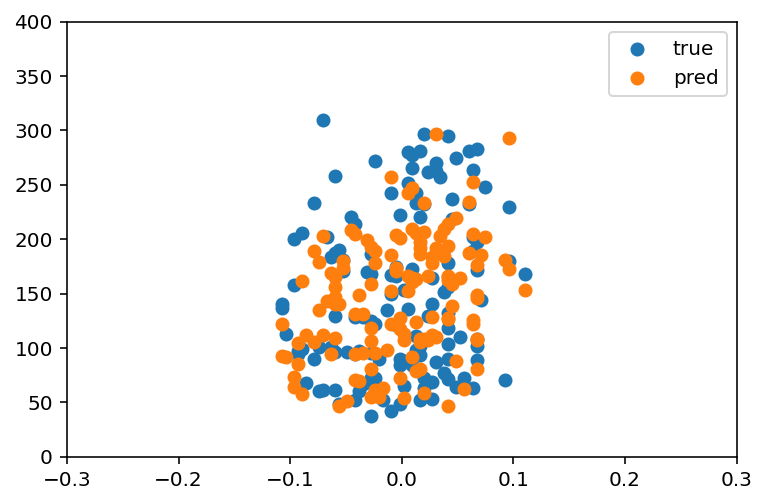

In [93]:
plt.scatter(X_test_L[:, 0], y_test_L, label="true")
plt.scatter(X_test_L[:, 0], predictions_L, label="pred")
plt.ylim(0, 400)
plt.xlim(-0.3, 0.3)
plt.legend()
plt.show()

- 분하다 더 좋아보인다... 
- 위에서 만든 모델의 mse 값은 2932, LinearRegression 모델의 mse 값은 2821로 확인할 수 있으며, 선형회귀 모델과 비교해 봤을 때 처음 만든 모델 또한 나쁘지 않다고 판단한다.

# 2. Bike Sharing Demand

### 2.1 모듈설정(생략)

### 2.2 데이터 로드

### 2.3 데이터 분류 및 학습